In [1]:
# Data processing
import iris
import numpy as np
from pathlib import Path
# Visualization
import calendar
import cartopy.util
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams['mathtext.default'] = 'regular'

In [2]:
# Choose experiment and variable
base_exp = 'xnvtc'; base_plt = 'CheT orig'
sens_exp = 'xmekm'; sens_plt = 'CheT revised'
var_dir = 'o3'; var_plt = '$O_3$'
M_air = 28.97 # molar mass of dry air [g mol-1]
var_coeff = (M_air/48.00)*1e9 # coeff to convert mass mixing ratio to volume mixing ratio (48 is ozone's molar mass)
# Read data
path_to_ukca = Path('../data')
base = iris.load_cube(str(path_to_ukca / base_exp / f'{base_exp}_{var_dir}.nc'))*var_coeff
sens = iris.load_cube(str(path_to_ukca / sens_exp / f'{sens_exp}_{var_dir}.nc'))*var_coeff
# Path to results
path_to_figs = Path('../../../results')
path_to_figs.mkdir(exist_ok=True)
savefig = True

In [3]:
# Sample surface values
srf_base = base[:,0,...]
srf_sens = sens[:,0,...]
lats = base.coord('latitude').points
# Add cyclic longitude point for plotting
srf_base, cyclic_lons = cartopy.util.add_cyclic_point(srf_base.data, coord=srf_base.coord('longitude').points)
srf_sens = cartopy.util.add_cyclic_point(srf_sens.data)

In [4]:
# Find max value
print(max(np.max(srf_base.data), np.max(srf_sens.data)))

130.43501


In [5]:
# Make a movie for base experiment
fig, ax = plt.subplots(figsize=(10,4), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)), facecolor='w')
p00 = ax.contourf(cyclic_lons, lats, srf_base.data[0,...], transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), extend='max')
p00.cmap.set_over('r')
fig.colorbar(p00, ax=ax, shrink=0.8, label=f'{var_plt}, ppbv')
tstep = 0
ax.set_title(f'base ({base_exp}) Year {tstep//12+1} Month {tstep+1} ({calendar.month_abbr[tstep % 12 + 1]})')

def init():
    ax.coastlines()
    ax.set_global()
    return p00
def update(tstep):
    p00 = ax.contourf(cyclic_lons, lats, srf_base.data[tstep,...], transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), extend='max')
    ax.set_title(f'base ({base_exp}) Year {tstep//12+1} Month {tstep+1} ({calendar.month_abbr[tstep % 12 + 1]})')
    return p00

ani = FuncAnimation(fig, update, frames=np.arange(0, base.coord('time').shape[0]), init_func=init)
if savefig: ani.save(path_to_figs / base_exp / 'movie' / f'{base_exp}_{var_dir}.mp4')

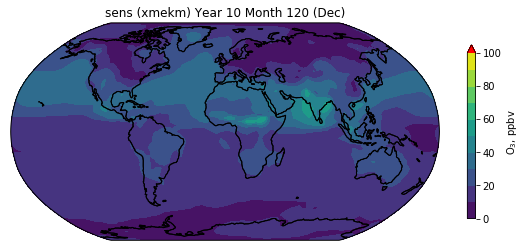

In [6]:
# Make a movie for sensitivity experiment
fig, ax = plt.subplots(figsize=(10,4), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)), facecolor='w')
p00 = ax.contourf(cyclic_lons, lats, srf_sens.data[0,...], transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), extend='max')
p00.cmap.set_over('r')
fig.colorbar(p00, ax=ax, shrink=0.8, label=f'{var_plt}, ppbv')
tstep = 0
ax.set_title(f'sens ({sens_exp}) Year {tstep//12+1} Month {tstep+1} ({calendar.month_abbr[tstep % 12 + 1]})')

def init():
    ax.coastlines()
    ax.set_global()
    return p00
def update(tstep):
    p00 = ax.contourf(cyclic_lons, lats, srf_sens.data[tstep,...], transform=ccrs.PlateCarree(), levels=np.arange(0,110,10), extend='max')
    ax.set_title(f'sens ({sens_exp}) Year {tstep//12+1} Month {tstep+1} ({calendar.month_abbr[tstep % 12 + 1]})')
    return p00

ani = FuncAnimation(fig, update, frames=np.arange(0, sens.coord('time').shape[0]), init_func=init)
if savefig: ani.save(path_to_figs / sens_exp / 'movie' / f'{sens_exp}_{var_dir}.mp4')